In [3]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')
print(tf.__version__)

2.7.0


In [4]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')
tf.get_logger().setLevel('INFO')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [5]:
train_data_path = "data/train"
test_data_path = "data/test"

import os
class_names = sorted(os.listdir(train_data_path))
class_names

['food', 'not_food']

In [6]:
tf.get_logger().setLevel('INFO')

In [7]:
# Create data loader
train_data = DataLoader.from_folder(train_data_path)
test_data = DataLoader.from_folder(test_data_path)

train_data, test_data

INFO:tensorflow:Load image with size: 1036, num_label: 2, labels: food, not_food.
INFO:tensorflow:Load image with size: 260, num_label: 2, labels: food, not_food.


(<tensorflow_examples.lite.model_maker.core.data_util.image_dataloader.ImageClassifierDataLoader at 0x7f90b9183e50>,
 <tensorflow_examples.lite.model_maker.core.data_util.image_dataloader.ImageClassifierDataLoader at 0x7f91598d8550>)

In [8]:
# Create model
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/Users/daniel/code/nutrify/env/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


32/32 [==============================] - 6s 94ms/step - loss: 0.4311 - accuracy: 0.8516
Epoch 2/5
32/32 [==============================] - 3s 93ms/step - loss: 0.2607 - accuracy: 0.9824
Epoch 3/5
32/32 [==============================] - 3s 93ms/step - loss: 0.2380 - accuracy: 0.9922
Epoch 4/5
32/32 [==============================] - 3s 92ms/step - loss: 0.2292 - accuracy: 0.9971
Epoch 5/5
32/32 [==============================] - 3s 96ms/step - loss: 0.2243 - accuracy: 0.9980


In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
test_loss, test_accuracy

9/9 [==============================] - 2s 117ms/step - loss: 0.2612 - accuracy: 0.9808


(0.26116758584976196, 0.9807692170143127)

In [10]:
# 374/374 [==============================] - 22s 58ms/step - loss: 0.2660 - accuracy: 0.9664
# (0.2660052180290222, 0.9663682579994202)

In [11]:
# Save the model
model.export(export_dir='.', tflite_filename="models/food_not_food_model_v5.tflite")

INFO:tensorflow:Assets written to: /var/folders/ms/842f9jln7dz5b1xzjpjv_n2w0000gn/T/tmpd70u_k5r/assets


INFO:tensorflow:Assets written to: /var/folders/ms/842f9jln7dz5b1xzjpjv_n2w0000gn/T/tmpd70u_k5r/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /var/folders/ms/842f9jln7dz5b1xzjpjv_n2w0000gn/T/tmp4l9mzqp2/labels.txt


INFO:tensorflow:Saving labels in /var/folders/ms/842f9jln7dz5b1xzjpjv_n2w0000gn/T/tmp4l9mzqp2/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./models/food_not_food_model_v5.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./models/food_not_food_model_v5.tflite


In [15]:
# Load image
def pred_and_plot(image_path, img_shape=224):
    # Read in the image
    img = tf.io.read_file(image_path)
    # Decode it into a tensor
    img = tf.image.decode_jpeg(img)
    # Resize the image
    img = tf.image.resize(img, [img_shape, img_shape])
    # Scale pixels
    img = img/255.
    preds = model.predict_top_k(tf.expand_dims(img, axis=0), k=2, batch_size=1)
    print(preds[0])

    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Pred class: {preds[0][0][0]} | Prob: {float(preds[0][0][1]):.3f}")

In [16]:
# Get image chicken wings
pred_and_plot("images/chicken_wings.jpeg")

[('food', 0.933155), ('not_food', 0.06684499)]


In [17]:
# !wget https://images.hgmsites.net/hug/tesla-cybertruck_100725713_h.jpg
pred_and_plot("images/tesla_cyber_truck.jpg")

[('not_food', 0.9298373), ('food', 0.07016276)]


--2021-12-09 15:16:00--  https://cdn.pocket-lint.com/r/s/1200x630/assets/images/152137-laptops-review-apple-macbook-pro-2020-review-image1-pbzm4ejvvs.jpg
Resolving cdn.pocket-lint.com (cdn.pocket-lint.com)... 13.226.107.121, 13.226.107.95, 13.226.107.83, ...
Connecting to cdn.pocket-lint.com (cdn.pocket-lint.com)|13.226.107.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173515 (169K) [image/jpeg]
Saving to: '152137-laptops-review-apple-macbook-pro-2020-review-image1-pbzm4ejvvs.jpg’

152137-laptops-revi 100%[===================>] 169.45K   322KB/s    in 0.5s    

2021-12-09 15:16:02 (322 KB/s) - '152137-laptops-review-apple-macbook-pro-2020-review-image1-pbzm4ejvvs.jpg’ saved [173515/173515]

[('not_food', 0.8310447), ('food', 0.16895539)]


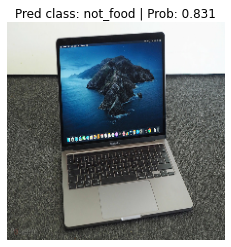

In [51]:
pred_and_plot("images/apple_macbook_pro.jpg")